In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# number of rows
df.shape[0]

303

In [8]:
# number of columns
df.shape[1]

14

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: title={'center': 'Target Distribution'}, xlabel='target'>

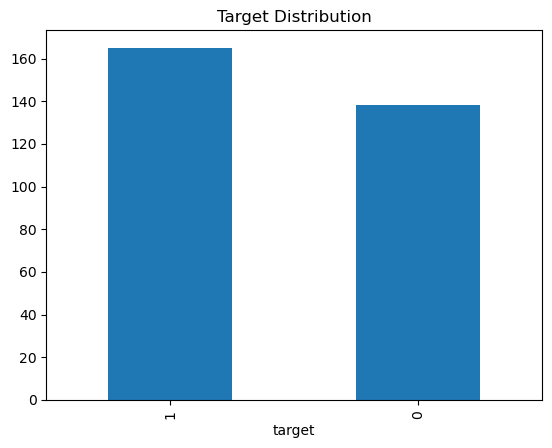

In [12]:
df['target'].value_counts().plot(kind='bar', title='Target Distribution')


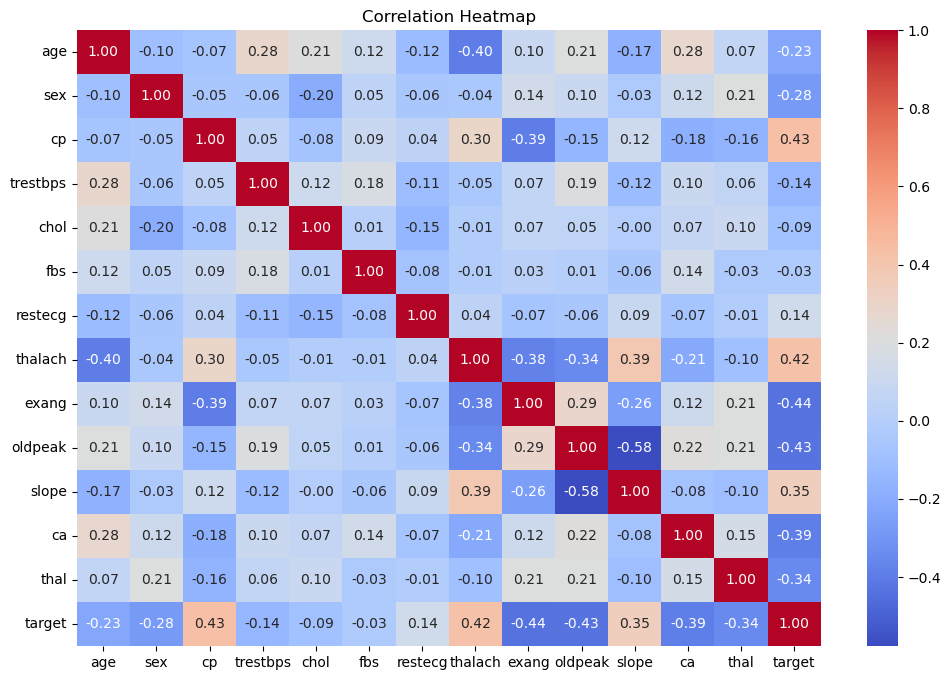

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select columns to scale (usually numeric ones only)
numeric_cols = df.select_dtypes(include='number').columns

# Apply scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0
302,0.583333,0.0,0.333333,0.339623,0.251142,0.0,0.0,0.786260,0.0,0.000000,0.5,0.25,0.666667,0.0


In [25]:
df = df.to_numpy()
df

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.33333333,
        1.        ],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.66666667,
        1.        ],
       [0.25      , 0.        , 0.33333333, ..., 0.        , 0.66666667,
        1.        ],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.58333333, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.25      , 0.66666667,
        0.        ]])

In [29]:
X = df[:, :12]   
y = df[:, 13]    

print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
X_sample = X[0]
y_sample = y[0]

print(X_sample, y_sample)

[0.70833333 1.         1.         0.48113208 0.24429224 1.
 0.         0.60305344 0.         0.37096774 0.         0.        ] 1.0


In [31]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[0.7083, 1.0000, 1.0000, 0.4811, 0.2443, 1.0000, 0.0000, 0.6031, 0.0000,
          0.3710, 0.0000, 0.0000],
         [0.1667, 1.0000, 0.6667, 0.3396, 0.2831, 0.0000, 0.5000, 0.8855, 0.0000,
          0.5645, 0.0000, 0.0000],
         [0.2500, 0.0000, 0.3333, 0.3396, 0.1781, 0.0000, 0.0000, 0.7710, 0.0000,
          0.2258, 1.0000, 0.0000],
         [0.5625, 1.0000, 0.3333, 0.2453, 0.2511, 0.0000, 0.5000, 0.8168, 0.0000,
          0.1290, 1.0000, 0.0000],
         [0.5833, 0.0000, 0.0000, 0.2453, 0.5205, 0.0000, 0.5000, 0.7023, 1.0000,
          0.0968, 1.0000, 0.0000]]),
 tensor([1., 1., 1., 1., 1.]))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


len(X_train), len(y_train), len(X_test), len(y_test)

(212, 212, 91, 91)

In [23]:
import torch
from torch import nn

torch.manual_seed(42)


In [35]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def train_model(model, X_train, y_train, 
                X_val, y_val,
                epochs=50, 
                lr=1e-3,
                batch_size=32):

    # Prepare PyTorch loaders
    train_ds = TensorDataset(X_train, y_train)
    val_ds = TensorDataset(X_val, y_val)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size*2)

    # Define optimizer and loss
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()

    # To store losses each epoch
    train_losses = []
    val_losses = []

    for epoch in range(1, epochs+1):
        # ---- Training ----
        model.train()
        batch_loss = 0.0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            logits = model(xb).squeeze()
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()
            batch_loss += loss.item()
        epoch_train_loss = batch_loss / len(train_loader)
        train_losses.append(epoch_train_loss)

        # ---- Validation ----
        model.eval()
        with torch.no_grad():
            val_batch_loss = 0.0
            for xb, yb in val_loader:
                logits = model(xb).squeeze()
                loss = criterion(logits, yb)
                val_batch_loss += loss.item()
            epoch_val_loss = val_batch_loss / len(val_loader)
            val_losses.append(epoch_val_loss)

        # (Optional) print progress
        if epoch % 10 == 0 or epoch == 1:
            print(f"Epoch {epoch:02d}/{epochs} | "
                  f"Train Loss={epoch_train_loss:.4f} | "
                  f"Val Loss={epoch_val_loss:.4f}")
    
    return train_losses, val_losses

def evaluate_model(model, X_test, y_test):
    """
    Returns dict of evaluation metrics: accuracy, precision, recall, AUC
    """
    model.eval()
    with torch.no_grad():
        logits = model(X_test).squeeze()
        probs  = torch.sigmoid(logits)
        y_pred = (probs >= 0.5).float()
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, probs)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "auc": auc
    }


In [36]:

class LogisticNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        # BCEWithLogitsLoss => raw logits
        return self.linear(x)


In [37]:

class OneHiddenLayer(nn.Module):
    def __init__(self, input_dim, hidden_dim=32, activation=nn.ReLU):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            activation(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        return self.net(x)


In [38]:
class TwoHiddenLayer(nn.Module):
    def __init__(self, input_dim, h1=64, h2=32, activation=nn.ReLU):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, h1),
            activation(),
            nn.Linear(h1, h2),
            activation(),
            nn.Linear(h2, 1)
        )

    def forward(self, x):
        return self.net(x)


In [39]:
input_dim = X_train.shape[1]

# Let's define three models, train them, measure performance
model1 = LogisticNN(input_dim)
model2 = OneHiddenLayer(input_dim, hidden_dim=32, activation=nn.ReLU)
model3 = TwoHiddenLayer(input_dim, h1=64, h2=32, activation=nn.ReLU)

print("==== Training LogisticNN ====")
_ = train_model(model1, X_train, y_train, X_test, y_test,
                epochs=50, lr=1e-3, batch_size=32)
metrics1 = evaluate_model(model1, X_test, y_test)
print("LogisticNN Test metrics:", metrics1)

print("\n==== Training OneHiddenLayer ====")
_ = train_model(model2, X_train, y_train, X_test, y_test,
                epochs=50, lr=1e-3, batch_size=32)
metrics2 = evaluate_model(model2, X_test, y_test)
print("OneHiddenLayer Test metrics:", metrics2)

print("\n==== Training TwoHiddenLayer ====")
_ = train_model(model3, X_train, y_train, X_test, y_test,
                epochs=50, lr=1e-3, batch_size=32)
metrics3 = evaluate_model(model3, X_test, y_test)
print("TwoHiddenLayer Test metrics:", metrics3)

# Compare
print("\n======== Final Comparison ========")
print("LogisticNN      :", metrics1)
print("OneHiddenLayer  :", metrics2)
print("TwoHiddenLayer  :", metrics3)


==== Training LogisticNN ====
Epoch 01/50 | Train Loss=0.7791 | Val Loss=0.7520
Epoch 10/50 | Train Loss=0.7316 | Val Loss=0.7116
Epoch 20/50 | Train Loss=0.6937 | Val Loss=0.6826
Epoch 30/50 | Train Loss=0.6676 | Val Loss=0.6615
Epoch 40/50 | Train Loss=0.6458 | Val Loss=0.6432
Epoch 50/50 | Train Loss=0.6245 | Val Loss=0.6269
LogisticNN Test metrics: {'accuracy': 0.7032967032967034, 'precision': 0.6575342465753424, 'recall': 0.96, 'auc': 0.8390243902439024}

==== Training OneHiddenLayer ====
Epoch 01/50 | Train Loss=0.6884 | Val Loss=0.6815
Epoch 10/50 | Train Loss=0.6419 | Val Loss=0.6407
Epoch 20/50 | Train Loss=0.5471 | Val Loss=0.5544
Epoch 30/50 | Train Loss=0.4486 | Val Loss=0.4833
Epoch 40/50 | Train Loss=0.4010 | Val Loss=0.4571
Epoch 50/50 | Train Loss=0.3850 | Val Loss=0.4516
OneHiddenLayer Test metrics: {'accuracy': 0.7912087912087912, 'precision': 0.8444444444444444, 'recall': 0.76, 'auc': 0.8824390243902439}

==== Training TwoHiddenLayer ====
Epoch 01/50 | Train Loss=0.6

In [40]:
{
  "accuracy": ...,
  "precision": ...,
  "recall": ...,
  "auc": ...
}


{'accuracy': Ellipsis,
 'precision': Ellipsis,
 'recall': Ellipsis,
 'auc': Ellipsis}

In [41]:
epoch_values = [10, 30, 50, 100]
results_epochs = []

for ep in epoch_values:
    model_temp = TwoHiddenLayer(input_dim, h1=64, h2=32, activation=nn.ReLU)
    train_model(model_temp, X_train, y_train, X_test, y_test, 
                epochs=ep, lr=1e-3, batch_size=32)
    metrics = evaluate_model(model_temp, X_test, y_test)
    results_epochs.append((ep, metrics["accuracy"]))

print("=== Sensitivity to Epochs ===")
for ep, acc in results_epochs:
    print(f"Epochs={ep} => Accuracy={acc:.4f}")



Epoch 01/10 | Train Loss=0.6939 | Val Loss=0.6890
Epoch 10/10 | Train Loss=0.5115 | Val Loss=0.5235
Epoch 01/30 | Train Loss=0.6876 | Val Loss=0.6809
Epoch 10/30 | Train Loss=0.5164 | Val Loss=0.5239
Epoch 20/30 | Train Loss=0.3757 | Val Loss=0.4271
Epoch 30/30 | Train Loss=0.3409 | Val Loss=0.4333
Epoch 01/50 | Train Loss=0.6876 | Val Loss=0.6828
Epoch 10/50 | Train Loss=0.5023 | Val Loss=0.5202
Epoch 20/50 | Train Loss=0.3677 | Val Loss=0.4411
Epoch 30/50 | Train Loss=0.3425 | Val Loss=0.4462
Epoch 40/50 | Train Loss=0.3280 | Val Loss=0.4644
Epoch 50/50 | Train Loss=0.3157 | Val Loss=0.4464
Epoch 01/100 | Train Loss=0.6892 | Val Loss=0.6828
Epoch 10/100 | Train Loss=0.5007 | Val Loss=0.5326
Epoch 20/100 | Train Loss=0.3738 | Val Loss=0.4699
Epoch 30/100 | Train Loss=0.3553 | Val Loss=0.4565
Epoch 40/100 | Train Loss=0.3418 | Val Loss=0.4710
Epoch 50/100 | Train Loss=0.3195 | Val Loss=0.4656
Epoch 60/100 | Train Loss=0.3240 | Val Loss=0.4642
Epoch 70/100 | Train Loss=0.3047 | Val Loss

In [42]:
model_no_hidden = LogisticNN(input_dim)
model_one_hidden = OneHiddenLayer(input_dim, hidden_dim=32)
model_two_hidden = TwoHiddenLayer(input_dim, h1=64, h2=32)

layers_results = {}

for label, m in [("0 hidden", model_no_hidden),
                 ("1 hidden", model_one_hidden),
                 ("2 hidden", model_two_hidden)]:
    train_model(m, X_train, y_train, X_test, y_test, epochs=50, lr=1e-3)
    met = evaluate_model(m, X_test, y_test)
    layers_results[label] = met["accuracy"]

print("=== Sensitivity to #Layers ===")
for k,v in layers_results.items():
    print(f"{k:10s} => Accuracy={v:.4f}")


Epoch 01/50 | Train Loss=0.7168 | Val Loss=0.7150
Epoch 10/50 | Train Loss=0.6843 | Val Loss=0.6838
Epoch 20/50 | Train Loss=0.6554 | Val Loss=0.6583
Epoch 30/50 | Train Loss=0.6334 | Val Loss=0.6377
Epoch 40/50 | Train Loss=0.6117 | Val Loss=0.6195
Epoch 50/50 | Train Loss=0.5983 | Val Loss=0.6037
Epoch 01/50 | Train Loss=0.6634 | Val Loss=0.6700
Epoch 10/50 | Train Loss=0.5869 | Val Loss=0.6014
Epoch 20/50 | Train Loss=0.4808 | Val Loss=0.5139
Epoch 30/50 | Train Loss=0.4177 | Val Loss=0.4698
Epoch 40/50 | Train Loss=0.3898 | Val Loss=0.4507
Epoch 50/50 | Train Loss=0.3686 | Val Loss=0.4463
Epoch 01/50 | Train Loss=0.7044 | Val Loss=0.7022
Epoch 10/50 | Train Loss=0.5179 | Val Loss=0.5430
Epoch 20/50 | Train Loss=0.3624 | Val Loss=0.4578
Epoch 30/50 | Train Loss=0.3484 | Val Loss=0.4799
Epoch 40/50 | Train Loss=0.3415 | Val Loss=0.4860
Epoch 50/50 | Train Loss=0.3166 | Val Loss=0.4739
=== Sensitivity to #Layers ===
0 hidden   => Accuracy=0.8352
1 hidden   => Accuracy=0.7912
2 hidden 

In [43]:
h1_values = [16, 32, 64, 128]
h2_values = [8, 16, 32]
results_units = []

for h1 in h1_values:
    for h2 in h2_values:
        model_temp = TwoHiddenLayer(input_dim, h1=h1, h2=h2, activation=nn.ReLU)
        train_model(model_temp, X_train, y_train, X_test, y_test, epochs=50, lr=1e-3)
        met = evaluate_model(model_temp, X_test, y_test)
        results_units.append(((h1, h2), met["accuracy"]))

print("\n=== Sensitivity to #Units ===")
for (h1, h2), acc in sorted(results_units, key=lambda x: x[1], reverse=True):
    print(f"(h1={h1}, h2={h2}) => Accuracy={acc:.4f}")


Epoch 01/50 | Train Loss=0.6991 | Val Loss=0.6859
Epoch 10/50 | Train Loss=0.6557 | Val Loss=0.6566
Epoch 20/50 | Train Loss=0.5490 | Val Loss=0.5683
Epoch 30/50 | Train Loss=0.4254 | Val Loss=0.4710
Epoch 40/50 | Train Loss=0.3796 | Val Loss=0.4639
Epoch 50/50 | Train Loss=0.3634 | Val Loss=0.4552
Epoch 01/50 | Train Loss=0.6899 | Val Loss=0.6852
Epoch 10/50 | Train Loss=0.6317 | Val Loss=0.6358
Epoch 20/50 | Train Loss=0.4904 | Val Loss=0.5214
Epoch 30/50 | Train Loss=0.3961 | Val Loss=0.4695
Epoch 40/50 | Train Loss=0.3640 | Val Loss=0.4563
Epoch 50/50 | Train Loss=0.3501 | Val Loss=0.4596
Epoch 01/50 | Train Loss=0.6902 | Val Loss=0.6849
Epoch 10/50 | Train Loss=0.6418 | Val Loss=0.6386
Epoch 20/50 | Train Loss=0.4577 | Val Loss=0.4972
Epoch 30/50 | Train Loss=0.3788 | Val Loss=0.4655
Epoch 40/50 | Train Loss=0.3599 | Val Loss=0.4652
Epoch 50/50 | Train Loss=0.3560 | Val Loss=0.4654
Epoch 01/50 | Train Loss=0.6917 | Val Loss=0.6797
Epoch 10/50 | Train Loss=0.6567 | Val Loss=0.6493


In [45]:
act_map = {
    "ReLU":    nn.ReLU,
    "Tanh":    nn.Tanh,
    "Sigmoid": nn.Sigmoid,   
}

act_results = []
for act_name, act_fn in act_map.items():
    model_temp = TwoHiddenLayer(
        input_dim,           # number of input features
        h1=64, h2=32,        # hidden‑layer sizes
        activation=act_fn    # current activation
    )
    train_model(
        model_temp,
        X_train, y_train,
        X_test,  y_test,
        epochs=50,
        lr=1e-3,
        batch_size=32
    )
    metrics = evaluate_model(model_temp, X_test, y_test)
    act_results.append((act_name, metrics["accuracy"]))

print("\n=== Sensitivity to Activation Function (no LeakyReLU) ===")
for name, acc in sorted(act_results, key=lambda x: x[1], reverse=True):
    print(f"{name:7s} => Accuracy = {acc:.4f}")


Epoch 01/50 | Train Loss=0.6893 | Val Loss=0.6817
Epoch 10/50 | Train Loss=0.5137 | Val Loss=0.5224
Epoch 20/50 | Train Loss=0.3716 | Val Loss=0.4471
Epoch 30/50 | Train Loss=0.3528 | Val Loss=0.4625
Epoch 40/50 | Train Loss=0.3427 | Val Loss=0.4533
Epoch 50/50 | Train Loss=0.3294 | Val Loss=0.4713
Epoch 01/50 | Train Loss=0.6811 | Val Loss=0.6665
Epoch 10/50 | Train Loss=0.4421 | Val Loss=0.4741
Epoch 20/50 | Train Loss=0.3666 | Val Loss=0.4482
Epoch 30/50 | Train Loss=0.3670 | Val Loss=0.4605
Epoch 40/50 | Train Loss=0.3559 | Val Loss=0.4836
Epoch 50/50 | Train Loss=0.3571 | Val Loss=0.4786
Epoch 01/50 | Train Loss=0.7069 | Val Loss=0.6991
Epoch 10/50 | Train Loss=0.6839 | Val Loss=0.6791
Epoch 20/50 | Train Loss=0.6686 | Val Loss=0.6623
Epoch 30/50 | Train Loss=0.6191 | Val Loss=0.6182
Epoch 40/50 | Train Loss=0.5152 | Val Loss=0.5295
Epoch 50/50 | Train Loss=0.4334 | Val Loss=0.4616

=== Sensitivity to Activation Function (no LeakyReLU) ===
ReLU    => Accuracy = 0.8132
Sigmoid => A